# Variance

Our start point to understand variance is a dataset that describes some phenomenon.


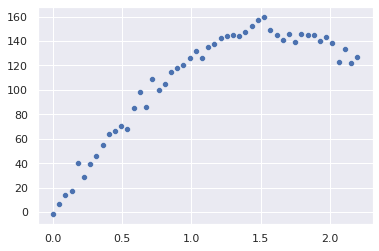

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
rng = np.random.RandomState(0) 
x = np.linspace(0, 0.7 * np.pi, num=50)

n = np.random.normal(scale=5, size=x.size)

y = 150 * np.sin(x) + n

sns.scatterplot(x=x, y=y);


Our goal is to use a *training* part of this dataset to create a model, and then use a *test* part of it to test if the model can fit the testing data.
First, lets use the scikit-learn to split the dataset

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=20,random_state=0)

And now, lets create Random forest model to train it

In [3]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(bootstrap=True, random_state=0)

In [4]:
model = regr.fit(np.array(x_train).reshape(-1, 1), y_train)



Now let's do something not smart! Let's evaluate using  mean squared error  (MSE), root mean squared error (RMSE) and r-squared

In [5]:
from sklearn.metrics import mean_squared_error
y_pred2 = model.predict(np.array(x_train).reshape(-1, 1))
mse = mean_squared_error(y_train, y_pred2, squared = False)
print(f'The mean squared error using ONLY training data is {mse}.')

The mean squared error using ONLY training data is 2.98050566321065.


In [6]:
rmse = mean_squared_error(y_train, y_pred2, squared = True)
print(f'The root mean squared error using ONLY training data is {rmse}.')

The root mean squared error using ONLY training data is 8.883414008430755.


In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred2)
print(f'The root mean squared error using ONLY training data is {r2}. ')

The root mean squared error using ONLY training data is 0.9957792803871689. 


Wow we got a perfect prediction! However, we are using the training dataset to train AND evaluate the model! So it is PROBABLE that we won't have a variance.
Let's try using the test dataset to evaluate our model

In [8]:
y_pred2 = model.predict(np.array(x_test).reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred2, squared = False)
print(f'The mean squared error using test data is {mse}.')

The mean squared error using test data is 7.168589208643131.


In [9]:
rmse = mean_squared_error(y_test, y_pred2, squared = True)
print(f'The root mean squared error using test data is {rmse}.')

The root mean squared error using test data is 51.38867124227475.


In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred2)
print(f'The root mean squared error using test data is {r2}. ')

The root mean squared error using test data is 0.972059581361779. 


Let's understand what is the meaning of this. When we are using the training dataset to evaluate the model, we don't have variance neither bias. It is a perfect model! However, when we use the test dataset (unknown for the model), we perceive variance. 
In other notebook we will discuss about **bias-variance tradeoff**.